In [45]:
import pandas as pd
import utils.gt.mot as mot

# idTracker

In [48]:
df = mot.load_idtracker('data/results/5Zebrafish_nocover_22min/__idtracker/trajectories.txt')

In [49]:
df.describe()

,frame,id,x,y,width,height,confidence
count,74995.000000,74995.000000,61368.000000,61368.000000,74995.0,74995.0,74995.0
mean,7500.000000,3.000000,779.367794,308.509644,-1.0,-1.0,-1.0
std,4329.867202,1.414223,347.652245,255.683607,0.0,0.0,0.0
min,1.000000,1.000000,209.900000,10.458000,-1.0,-1.0,-1.0
25%,3750.000000,2.000000,505.767500,90.749500,-1.0,-1.0,-1.0
50%,7500.000000,3.000000,761.540000,234.445000,-1.0,-1.0,-1.0
75%,11250.000000,4.000000,1034.400000,453.845000,-1.0,-1.0,-1.0
max,14999.000000,5.000000,1672.500000,1026.000000,-1.0,-1.0,-1.0


In [50]:
df.to_csv('zebrafish_idtracker_tracking.txt', header=False, index=False)

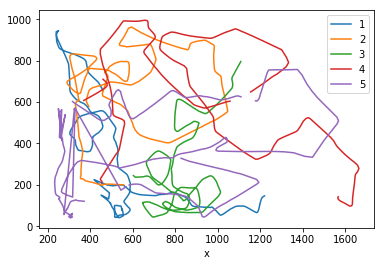

In [51]:
frames = 300
identity = 1
ax = df[df['id'] == identity][:500].plot('x', 'y', label=identity)
for identity in range(2, 6):
    df[df['id'] == identity][:500].plot('x', 'y', label=identity, ax=ax)

# ToxTrack

In [52]:
df = mot.load_toxtrack('data/results/5Zebrafish_nocover_22min/__toxtrack/Tracking_0.txt')

In [53]:
df.describe()

,frame,id,x,y,width,height,confidence
count,64642.000000,64642.000000,64642.000000,64642.000000,64642.0,64642.0,64642.0
mean,7363.133195,2.987361,541.912543,290.479211,-1.0,-1.0,-1.0
std,4477.502437,1.414020,355.339628,249.950777,0.0,0.0,0.0
min,1.000000,1.000000,27.913000,13.042300,-1.0,-1.0,-1.0
25%,3347.250000,2.000000,239.035500,80.445100,-1.0,-1.0,-1.0
50%,7089.500000,3.000000,503.870500,207.760500,-1.0,-1.0,-1.0
75%,11376.000000,4.000000,808.274000,427.264000,-1.0,-1.0,-1.0
max,14998.000000,5.000000,1473.890000,1024.190000,-1.0,-1.0,-1.0


In [54]:
df.to_csv('zebrafish_toxtrack_tracking.txt', header=False, index=False)

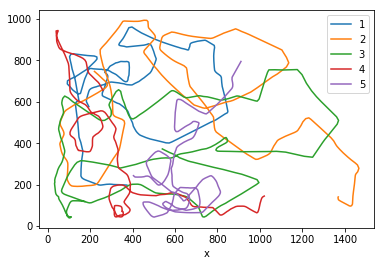

In [55]:
frames = 300
identity = 1
ax = df[df['id'] == identity][:500].plot('x', 'y', label=identity)
for identity in range(2, 6):
    df[df['id'] == identity][:500].plot('x', 'y', label=identity, ax=ax)

# Read MOT

In [56]:
df = pd.read_csv('zebrafish_toxtrack_tracking.txt', names=[u'frame', u'id', u'x', u'y', u'width', u'height', u'confidence'])

In [57]:
df[['x', 'y']].describe()

,x,y
count,64642.000000,64642.000000
mean,541.912543,290.479211
std,355.339628,249.950777
min,27.913000,13.042300
25%,239.035500,80.445100
50%,503.870500,207.760500
75%,808.274000,427.264000
max,1473.890000,1024.190000


# GT

In [58]:
# video_file = '/datagrid/ferda/data/youtube/Sowbug3.mp4'
# gt_file = 'data/GT/Sowbug3.pkl'
# video_file = '/datagrid/ferda/data/ants_ist/camera_1/Cam1_clip.avi'
# gt_file = 
video_file = '/datagrid/ferda/data/idTracker/5Zebrafish_nocover_22min.avi'
gt_file = 'data/GT/5Zebrafish_nocover_22min.txt'

# ['5Zebrafish_nocover_22min.pkl', 'Cam1__2018-02-07_16-52-13.pkl', 'data/GT/Cam1_clip.avi.pkl', 'Camera3-5min.mp4.pkl', 'Camera3.pkl', 'rep1-cam2.pkl', 'Sowbug3.pkl']
# ['idTracker/5Zebrafish_nocover_22min.avi', None, 'ants_ist/camera_1/Cam1_clip.avi', None, None, None, ]
# 'Cam1_clip.avi_sparse.pkl', 'Cam2_clip.avi_sparse.pkl', 

In [59]:
df = mot.load_mot(gt_file)

In [60]:
# print('{0:.0f}% of objects without ground truth.'.format(df.x.isna().mean() * 100))
frames_ideal = pd.Series(range(1, int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) + 1))
frames_gt = pd.Series(df['frame'].unique())
# if frames_gt.equals(frames_ideal):
#     print('Ground truth covers all video frames.')
# else:
#     print('{} frames missing in ground truth.'.format(len(frames_ideal) - len(frames_gt)))
# # cap.get(cv2.CAP_PROP_FRAME_COUNT)


len(frames_gt) / len(frames_ideal)

print('{0:.0f}% ({1:} out of {2:}) of frames have ground truth defined.'.format(len(frames_gt) / float(len(frames_ideal)) * 100, len(frames_gt), len(frames_ideal)))
print('{0:.0f}% ({1:} out of {2:}) of objects don\'t have ground truth defined.'.format((df.x == -1).mean() * 100, (df.x == -1).sum(), len(df)))

NameError: name 'cap' is not defined

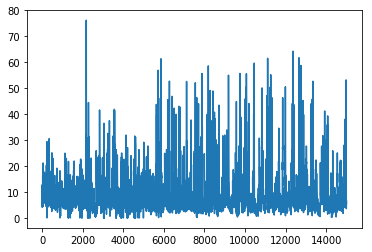

In [61]:
# plot interframe distances travelled
plt.plot(np.linalg.norm(df[df.id == 5][['x', 'y']].diff()[:-1], axis=1))

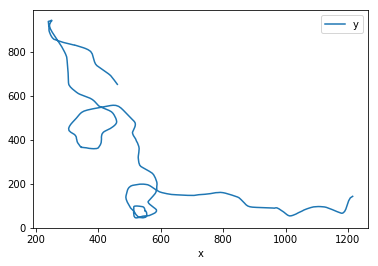

In [62]:
df[df.id == 3][['x', 'y']][:500].plot('x', 'y')

In [ ]:
df.set_index(['frame', 'id'])

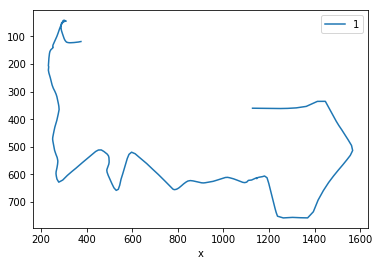

In [63]:
frames = 300
identity = 1
ax = df[df['id'] == identity][:frames].plot('x', 'y', label=identity)
# for identity in range(2, 6):
#     df[df['id'] == identity][:frames].plot('x', 'y', label=identity, ax=ax)
plt.gca().invert_yaxis()

# Evaluation

for intagration see utils/gt/mot.py:140

In [3]:
import motmetrics as mm
import matplotlib.pylab as plt
import utils.gt.mot as mot
from motmetrics.utils import compare_to_groundtruth

In [4]:
df_idtracker = mot.load_idtracker('data/results/5Zebrafish_nocover_22min/__idtracker/trajectories.txt')

In [5]:
df_gt = mot.load_mot('data/GT/5Zebrafish_nocover_22min.txt')

In [6]:
df_idtracker[df_idtracker.frame == 1][['x', 'y']]
df_gt[df_gt.frame == 1][['x', 'y']]

,x,y
0,375.053325,119.010665
1,395.327778,573.540278
2,460.868298,652.326340
3,600.601375,244.757732
4,1568.557851,144.801063


In [7]:
columns_mapper = {'frame': 'FrameId', 'id':'Id'}
acc = compare_to_groundtruth(df_gt.set_index(['frame', 'id']).rename(columns=columns_mapper), 
                       df_idtracker.set_index(['frame', 'id']).rename(columns=columns_mapper),
                       dist='euc', distfields=['x', 'y'], distth=10000)

/home/matej/.virtualenvs/ferda3/lib/python3.6/site-packages/motmetrics/distances.py:47: RuntimeWarning: invalid value encountered in greater
  C[C > max_d2] = np.nan


In [8]:
mh = mm.metrics.create()

In [9]:
summary = mh.compute(acc, metrics=mm.metrics.motchallenge_metrics)
print(mm.io.render_summary(summary, formatters=mh.formatters, namemap=mm.io.motchallenge_metric_names))

   IDF1   IDP   IDR  Rcll  Prcn GT MT PT ML    FP    FN IDs   FM  MOTA   MOTP
0 80.0% 80.0% 79.9% 81.4% 81.4%  5  4  1  0 13980 13985 160  895 62.5% 75.909


In [10]:
summary

,idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp
0,0.799507,0.799533,0.79948,0.813533,0.813588,5,4,1,0,13980,13985,160,895,0.625,75.90889


In [11]:
summary.to_csv(index=False)

'idf1,idp,idr,recall,precision,num_unique_objects,mostly_tracked,partially_tracked,mostly_lost,num_false_positives,num_misses,num_switches,num_fragmentations,mota,motp\n0.7995066502216741,0.799533302220148,0.79948,0.8135333333333333,0.8135875725048336,5,4,1,0,13980,13985,160,895,0.625,75.90888959192797\n'

/home/matej/.virtualenvs/ferda3/lib/python3.6/site-packages/motmetrics/distances.py:47: RuntimeWarning: invalid value encountered in greater
  C[C > max_d2] = np.nan


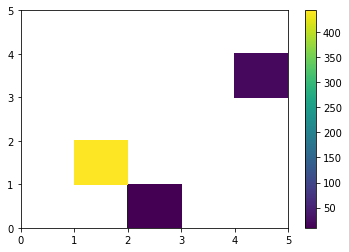

In [12]:
frame = 3000
c = mm.distances.norm2squared_matrix(df_idtracker[df_idtracker.frame == frame][['x', 'y']].values, 
                                     df_gt[df_gt.frame == frame][['x', 'y']].values, 10000)
plt.pcolor(c)
plt.colorbar()